In [24]:
import h5py
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [25]:
def load_image( filepath, leaf='MDF/images/0/image', normalise=255, astype='uint8' ):
    """ load the specified hdf file and look for a 3d intensity map; normalise output """
    f = h5py.File(filepath)
    # f.visit(print)

    d = f[leaf].value
    print('%s, shape: %s' % (filepath, d.shape,))
    n = np.min(d)
    m = np.max(d)
    out = ( (d - n) * (1/(m - n)) * normalise ).astype(astype)
    print('  min: %s->%s, max: %s->%s, mean: %s->%s, std: %s->%s' % (n,np.min(out), m,np.max(out), np.mean(d),np.mean(out), np.std(d),np.std(out),))
    return out


In [26]:
def show( data, title=None, low_pass_filter=0 ):
    """ crude display out data """
    vmin=np.min(data)
    vmax=np.max(data)
    
    fig=plt.figure()
    if title:
        fig.suptitle(title, fontsize=16)
        
    x,y,z=np.where(data>low_pass_filter)
    v=data[np.where(data>low_pass_filter)]
    
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(x,y,z, c=v, marker='.', vmin=vmin,vmax=vmax, s=1)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    return plt.show()


In [27]:
base_dir="/gpfs/slac/cryo/fs1/g/tomo-seg/mut_05/"
tomo = {
    'raw':        base_dir+"/rawtomograms/raw_tomo_bin4.hdf",
    'actin':      base_dir+"/tomoseg_actin3_bin2.hdf",
    'membrane':   base_dir+"/tomoseg_memb2.hdf",
    'microtuble': base_dir+"/tomoseg_mt.hdf",
    'tube':       base_dir+"/tomoseg_tubenearmt_bin2.hdf",
}


In [28]:
all_data = { label:load_image(filepath) for (label,filepath) in tomo.items() }


/gpfs/slac/cryo/fs1/g/tomo-seg/mut_05//rawtomograms/raw_tomo_bin4.hdf, shape: (62, 1280, 960)
  min: -3.0->0, max: 3.0->255, mean: 0.0053402698->127.2324651640205, std: 0.9488565->40.320958669870464
/gpfs/slac/cryo/fs1/g/tomo-seg/mut_05//tomoseg_actin3_bin2.hdf, shape: (62, 1280, 960)
  min: -0.06881775->0, max: 2.9694102->255, mean: 0.03241927->7.916089575982863, std: 0.093509994->7.8817281218940805
/gpfs/slac/cryo/fs1/g/tomo-seg/mut_05//tomoseg_memb2.hdf, shape: (62, 1280, 960)
  min: -0.0908308->0, max: 1.5630476->255, mean: 0.0016439599->13.859961935063843, std: 0.021104122->3.2798332437476136
/gpfs/slac/cryo/fs1/g/tomo-seg/mut_05//tomoseg_mt.hdf, shape: (62, 1280, 960)
  min: -0.0389266->0, max: 1.3787652->255, mean: 0.020886332->10.266881956695228, std: 0.049475484->8.90135117322233
/gpfs/slac/cryo/fs1/g/tomo-seg/mut_05//tomoseg_tubenearmt_bin2.hdf, shape: (62, 1280, 960)
  min: -0.03544575->0, max: 2.370061->254, mean: 0.055367813->9.103495503087197, std: 0.07107121->7.557947309

In [29]:
classes = {
    'empty': 0,
    'actin': 1,
    'membrane': 2,
    'microtuble': 3,
#     'tube': 4
}
low_pass_filter=16
cube = np.empty( [len(classes),62,1280,960] )
cube[0] = np.zeros( [62,1280,960] )
for (label, class_number) in classes.items():
    if label != 'empty':
        data = all_data[label]
        data[data<low_pass_filter] = 0
        print( '%s -> %s:\n%s' % (label,classes[label],data))
        cube[class_number] = data
print("cube: ")
print( cube )


actin -> 1:
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
membrane -> 2:
[[[22 19 17 ... 23 24 23]
  [20 18 16 ... 23 23 22]
  [19 17  0 ... 23 22 21]
  ...
  [21 19 18 ... 18 19 21]
  [22 20 18 ... 20 21 22]
  [22 20 18 ... 22 23 23]]

 [[16  0  0 ... 17 17 16]
  [ 0  0 

In [30]:
one_hot = cube.argmax( axis=0 )
print( "one-hot: ")
print( one_hot )

one-hot: 
[[[2 2 2 ... 2 2 2]
  [2 2 2 ... 2 2 2]
  [2 2 0 ... 2 2 2]
  ...
  [2 2 2 ... 2 2 2]
  [2 2 2 ... 2 2 2]
  [2 2 2 ... 2 2 2]]

 [[2 0 0 ... 2 2 2]
  [0 0 0 ... 2 2 2]
  [0 0 0 ... 2 0 0]
  ...
  [2 0 0 ... 0 0 2]
  [2 0 0 ... 0 2 2]
  [2 0 0 ... 2 2 2]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 2 2 2]
  [0 0 0 ... 2 2 2]
  [0 0 0 ... 2 2 2]
  ...
  [2 0 0 ... 2 2 2]
  [2 0 0 ... 2 2 2]
  [2 0 0 ... 2 2 2]]

 [[2 0 0 ... 2 2 2]
  [2 0 0 ... 2 2 2]
  [0 0 0 ... 2 2 2]
  ...
  [2 2 0 ... 2 2 2]
  [2 2 0 ... 2 2 2]
  [2 2 0 ... 2 2 2]]

 [[2 2 2 ... 2 2 2]
  [2 2 2 ... 2 2 2]
  [2 2 0 ... 2 2 2]
  ...
  [2 2 2 ... 2 2 2]
  [2 2 2 ... 2 2 2]
  [2 2 2 ... 2 2 2]]]


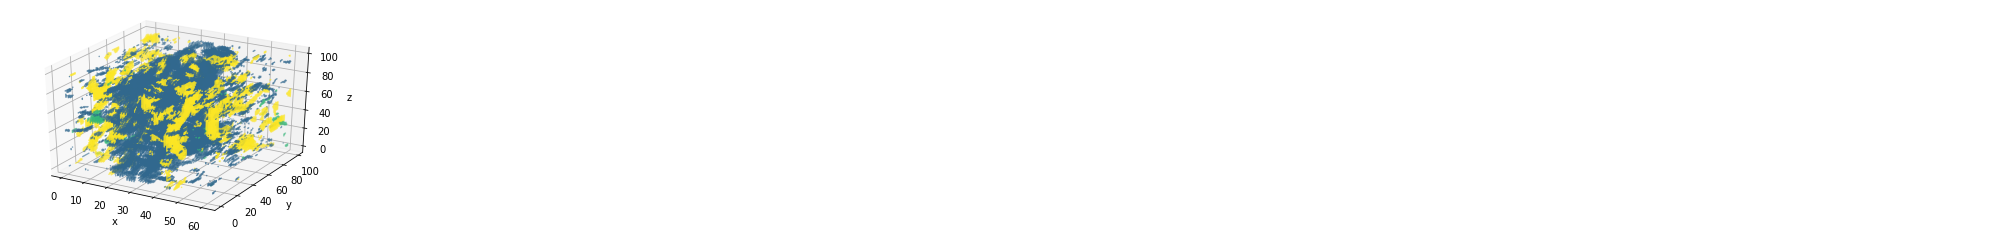

In [31]:
def crop( data, x=None, y=None, z=None, astype='uint8'):
    """ crop out a 3d portion of the 3d matrix with tuples as defined on axes """
    def _slice( tup ):
        return slice(None) if not tup else slice(tup[0],tup[1])
    return data[ _slice(x), _slice(y), _slice(z)].astype(astype)
show( crop( , x=None, y=(400,500), z=(400,500) ) )

In [41]:
one_hot.size

with h5py.File('mut05.hdf', 'w') as f:
    f.create_dataset('onehot', data=one_hot.reshape(1,one_hot.size))
    f.create_dataset('raw', data=all_data['raw'].reshape(1,all_data['raw'].size))

lets reread the file and reconstruct to make sure it's good

In [44]:
def load_tomo( filepath, shape=(62,1280,960) ):
    f = h5py.File(filepath)
#     f.visit(print)
    raw = f['raw'].value.reshape( shape )
    onehot = f['onehot'].value.reshape( shape )
    return raw, onehot
raw_data, onehot_data = load_tomo( 'mut05.hdf' )

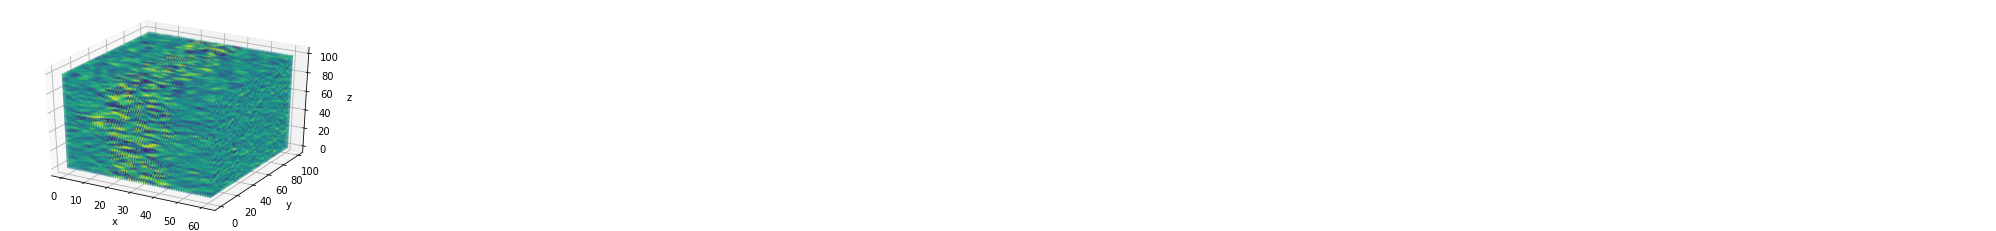

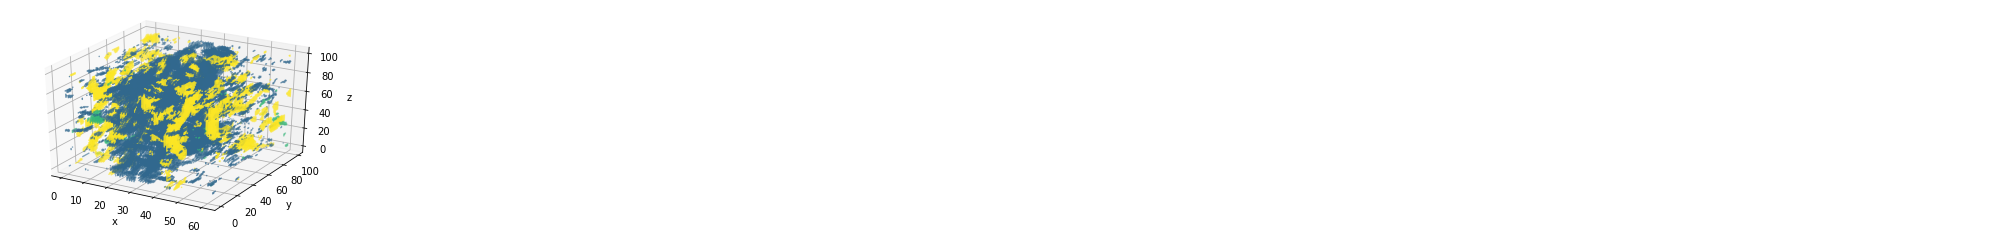

In [48]:
show( crop( raw_data, x=None, y=(400,500), z=(400,500) ) )
show( crop( onehot_data, x=None, y=(400,500), z=(400,500) ) )

create many little cubes for training. store as 1d array of 1d cubes

In [82]:
np.random.seed(200)
def get_random( size=32, x=62, y=1280, z=960 ):
    dx = np.random.randint(low=0, high=x-size)
    dy = np.random.randint(low=0, high=y-size)
    dz = np.random.randint(low=0, high=z-size)
    return (dx,dx+size), (dy,dy+size), (dz,dz+size)

iterations = 10
lotsa_small_onehot = []
lotsa_small_data = []
for i in range(10):

    dx,dy,dz = get_random(size=32)
    print("%s: %s, %s, %s" % (i,dx,dy,dz) )
    one = crop( one_hot, x=dx, y=dy, z=dz, astype='uint8')
    lotsa_small_onehot.append( one.reshape( (1,one.size) )[0]  )
    two = crop( all_data['raw'], x=dx, y=dy, z=dz, astype='uint8')
    lotsa_small_data.append( two.reshape( (1,two.size) )[0]  )
    

with h5py.File('mut05-cubes.hdf', 'w') as f:
    f.create_dataset('onehot', data=lotsa_small_onehot)
    f.create_dataset('raw', data=lotsa_small_data)

0: (26, 58), (617, 649), (784, 816)
1: (4, 36), (810, 842), (695, 727)
2: (12, 44), (1103, 1135), (345, 377)
3: (14, 46), (219, 251), (185, 217)
4: (25, 57), (139, 171), (902, 934)
5: (10, 42), (312, 344), (513, 545)
6: (7, 39), (1075, 1107), (923, 955)
7: (9, 41), (1167, 1199), (641, 673)
8: (14, 46), (279, 311), (85, 117)
9: (24, 56), (362, 394), (803, 835)


In [83]:
with h5py.File('mut05-cubes.hdf','r') as f:
    print( f['raw'].value )
    print( f['onehot'].value )

[[154 150 181 ... 127 153 173]
 [129  81  50 ... 173 164 123]
 [ 95 108 147 ... 163 124  79]
 ...
 [ 94  91 133 ...  90 133 168]
 [128  22  28 ...  66  41  74]
 [122 190 203 ... 166 140 100]]
[[0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [3 1 1 ... 0 0 0]
 [0 0 0 ... 0 3 0]]
